In [200]:
import imageio
import torch
import numpy as np
import cv2                 # resize image using cv2
from PIL import Image
import torchvision.transforms as T  # transform tensor to image
import torchvision
import matplotlib.pyplot as plt
import os


In [201]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [202]:
data_dir = './image/'
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']
filenames

['dog1.png', 'dog2.png', 'dog3.png']

In [203]:
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_arr = cv2.resize(img_arr, (256, 256))
    img_t = torch.from_numpy(img_arr) # here HxWxC
    img_t = img_t.permute(2, 0, 1) #here CxHxW
    """
    Next row of code, we kept only firt three channels.
    Sometimes images also have alpha channel indicating transparency, but our network only wants RGB input.
    """
    img_t = img_t[:3]
    batch[i] = img_t

C:\Users\tayfununal\AppData\Local\Temp\ipykernel_740\720113607.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(data_dir, filename))


In [204]:
transform = T.ToPILImage()
img = transform(batch[0])
img.show()

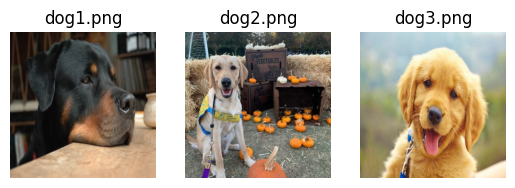

In [205]:
fig , ax = plt.subplots(1, 3)
for i in range(3):
    ax[i].imshow(torchvision.utils.make_grid(batch[i].permute(1,2,0)))
    ax[i].axis('off')
    ax[i].set_title('{}'.format(filenames[i]))

In [231]:
# normalizing the data 
batch = batch.float()
batch /= 255.0